In [15]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np
import pickle4

In [16]:
df = pd.read_csv('../data/cardata.csv')
df.head(300)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
295,city,2015,8.55,13.09,60076,Diesel,Dealer,Manual,0
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0


In [17]:
df.info(show_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [18]:
df['Selling_Price'] = df['Selling_Price'].astype('float16')
df['Present_Price'] = df['Present_Price'].astype('float16')

In [19]:
df['Year'] = df['Year'].astype('int64')
df['Driven_kms'] = df['Driven_kms'].astype('int64')
df['Owner'] = df['Owner'].astype('int32')

In [20]:
cat_features = df.select_dtypes(include=['object']).columns.to_list()
cat_features
df = df.loc[df['Year'] >= 2000]

In [21]:
for col in cat_features:
    print(f'Unique categories in {col}: {df[col].value_counts()}')

Unique categories in Car_Name: Car_Name
city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: count, Length: 98, dtype: int64
Unique categories in Fuel_Type: Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Unique categories in Selling_type: Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64
Unique categories in Transmission: Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


[4985:5011:1215/220730.048703:ERROR:cprocsp_api.cc(847)] Failed to load library /opt/cprocsp/lib/amd64/libcapi20.so: /opt/cprocsp/lib/amd64/libcapi20.so: cannot open shared object file: No such file or directory


<Axes: xlabel='Fuel_Type', ylabel='Selling_Price'>

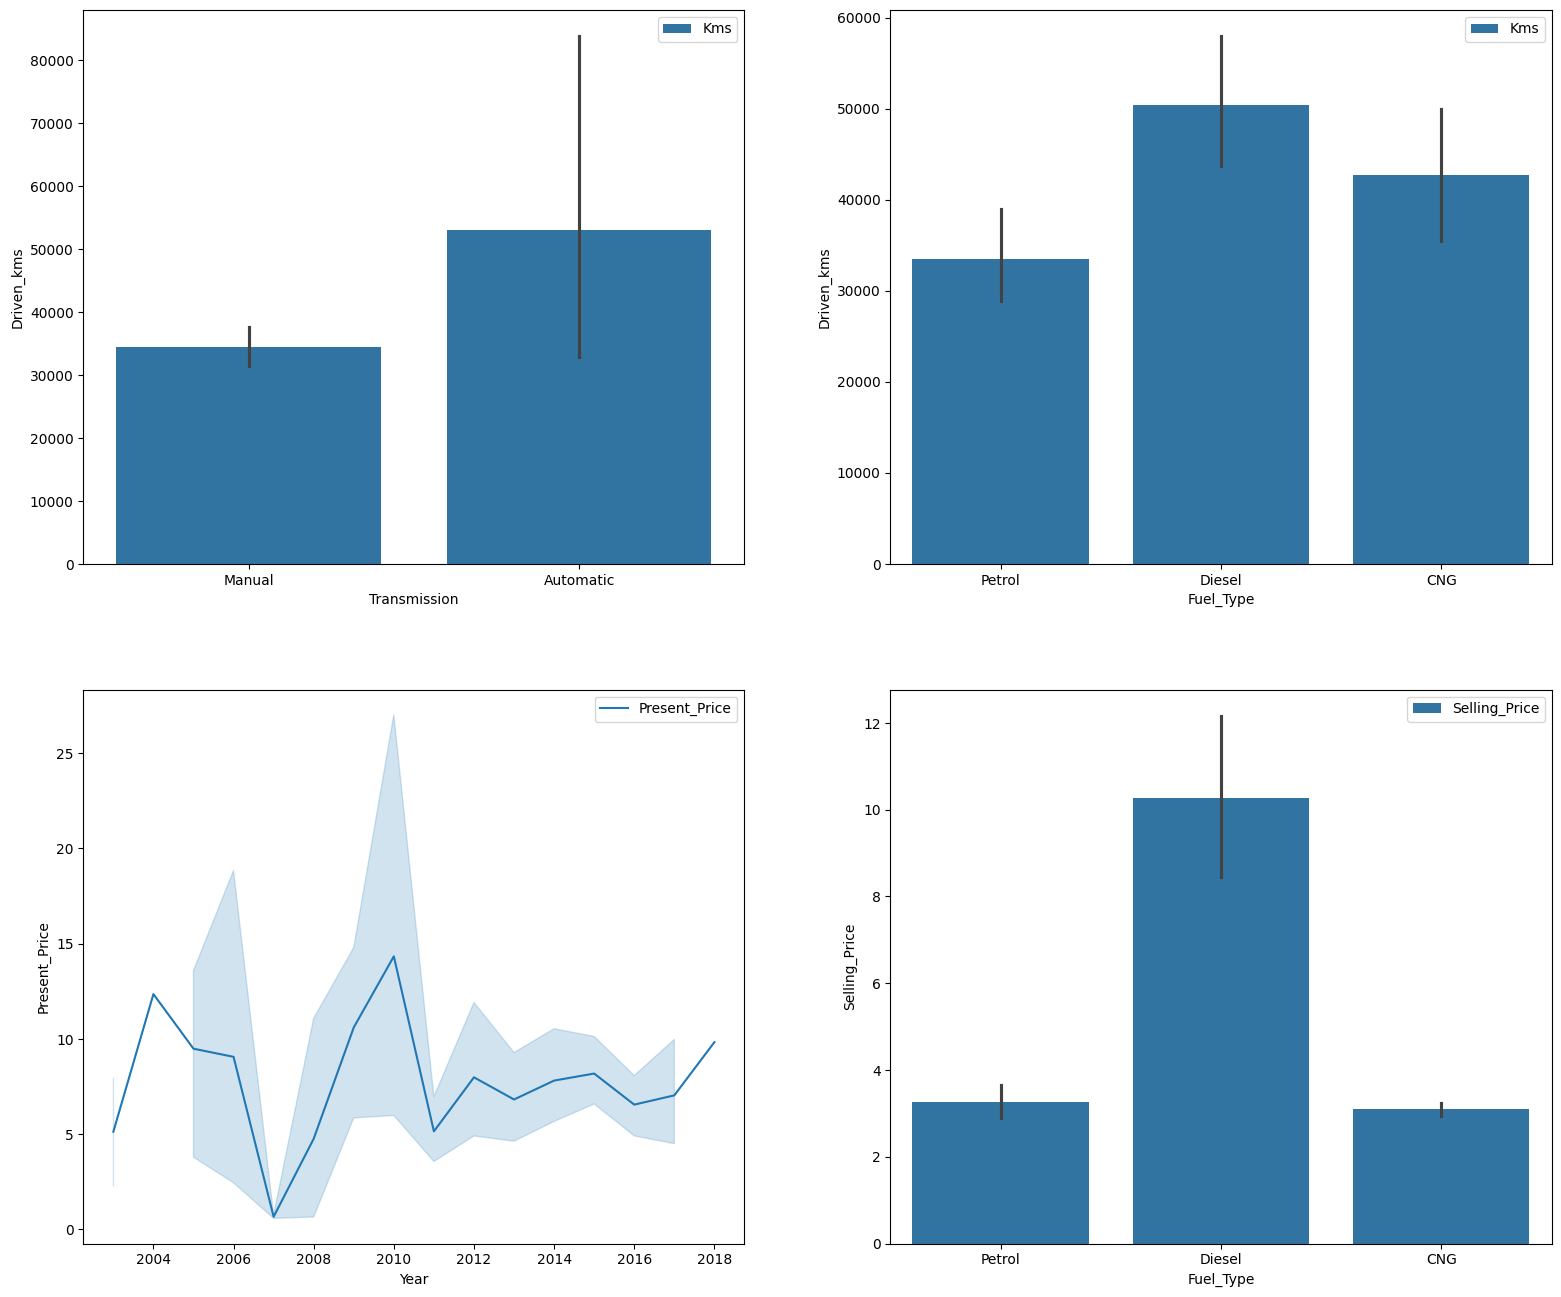

In [22]:
fig, axs = plt.pyplot.subplots(2,2)
fig.tight_layout(pad=1)
fig.set_size_inches(16.5, 14, forward=True)

sns.barplot(df,x='Transmission',y='Driven_kms', label='Kms', ax=axs[0,0])

sns.barplot(df,x='Fuel_Type',y='Driven_kms', label='Kms',ax=axs[0,1])
sns.lineplot(df,x='Year',y='Present_Price', label='Present_Price',ax=axs[1,0])

sns.barplot(df,x='Fuel_Type',y='Selling_Price', label='Selling_Price',ax=axs[1,1])


<Axes: xlabel='Year', ylabel='Selling_Price'>

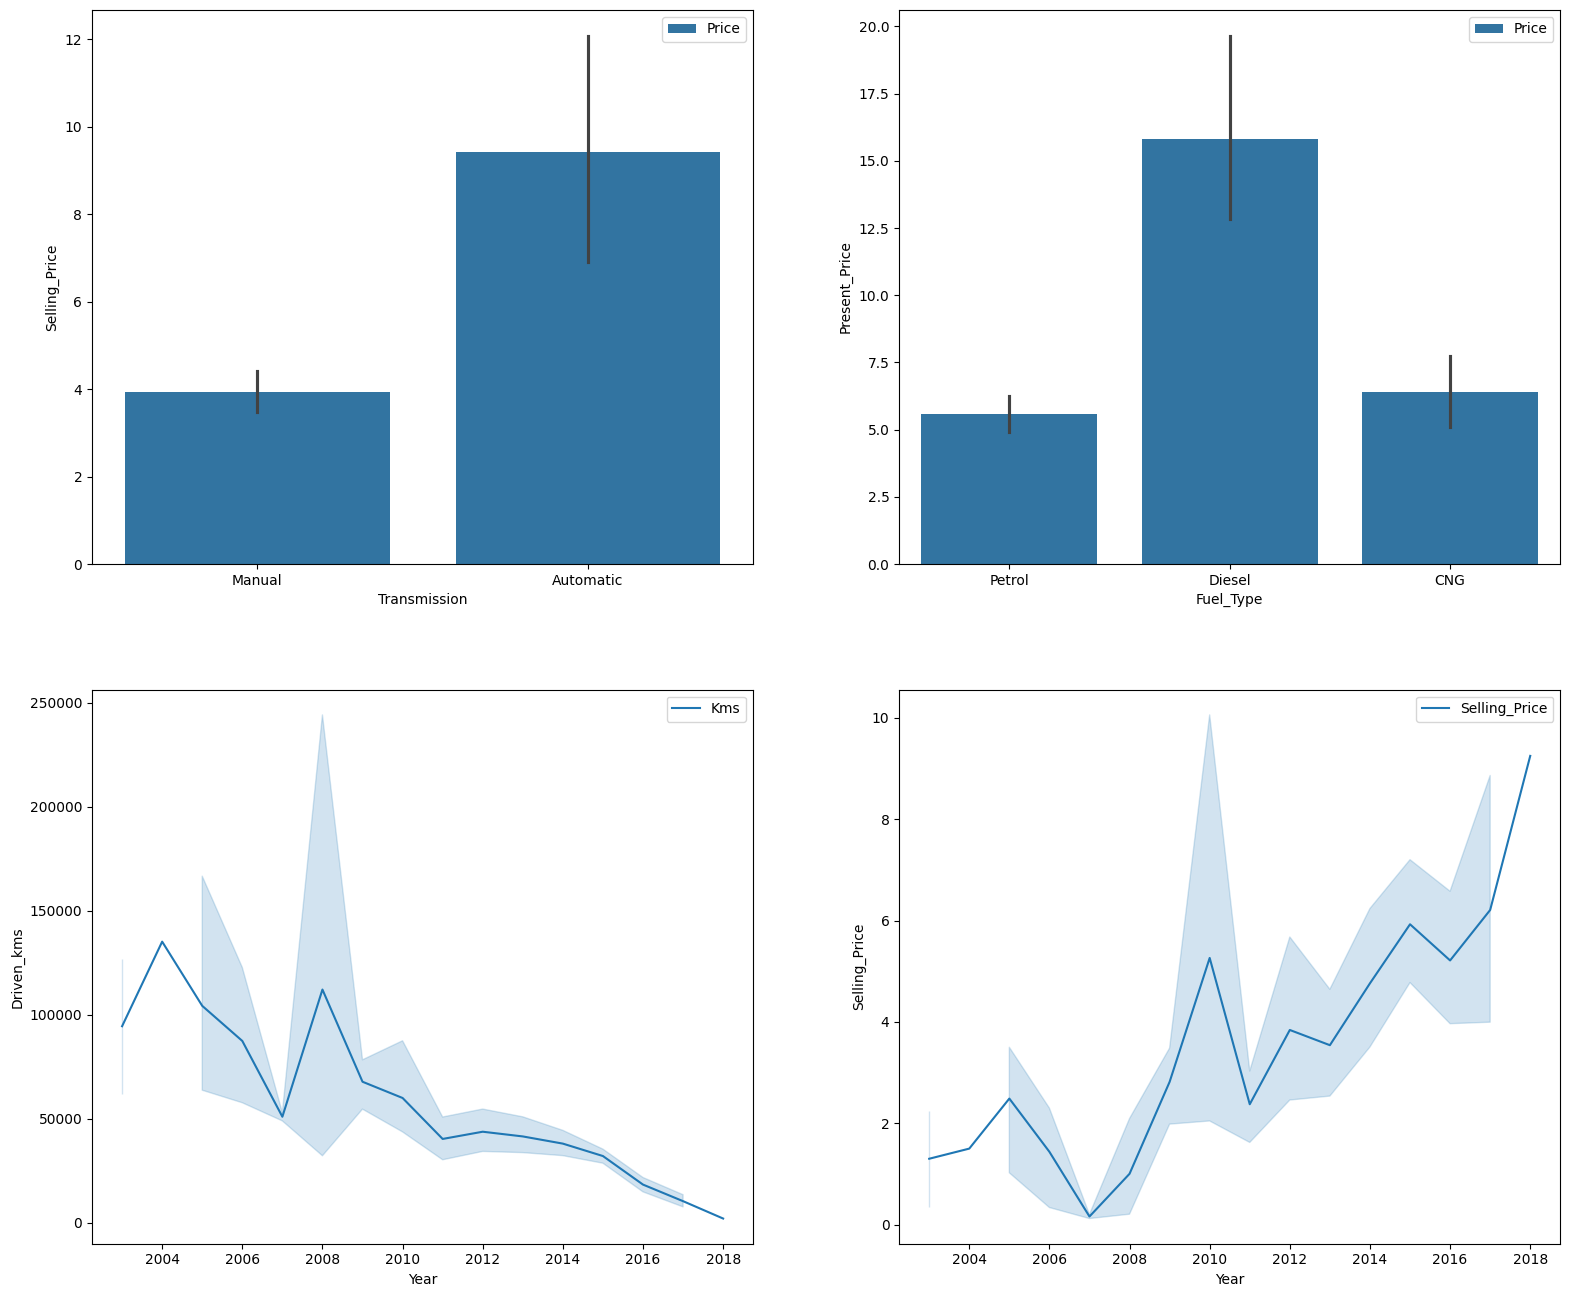

In [23]:
fig, axs = plt.pyplot.subplots(2,2)
fig.tight_layout(pad=1)
fig.set_size_inches(16.5, 14, forward=True)

sns.barplot(df,x='Transmission',y='Selling_Price', label='Price', ax=axs[0,0])

sns.barplot(df,x='Fuel_Type',y='Present_Price', label='Price',ax=axs[0,1])
sns.lineplot(df,x='Year',y='Driven_kms', label='Kms',ax=axs[1,0])

sns.lineplot(df,x='Year',y='Selling_Price', label='Selling_Price',ax=axs[1,1])


<Axes: xlabel='Owner', ylabel='Driven_kms'>

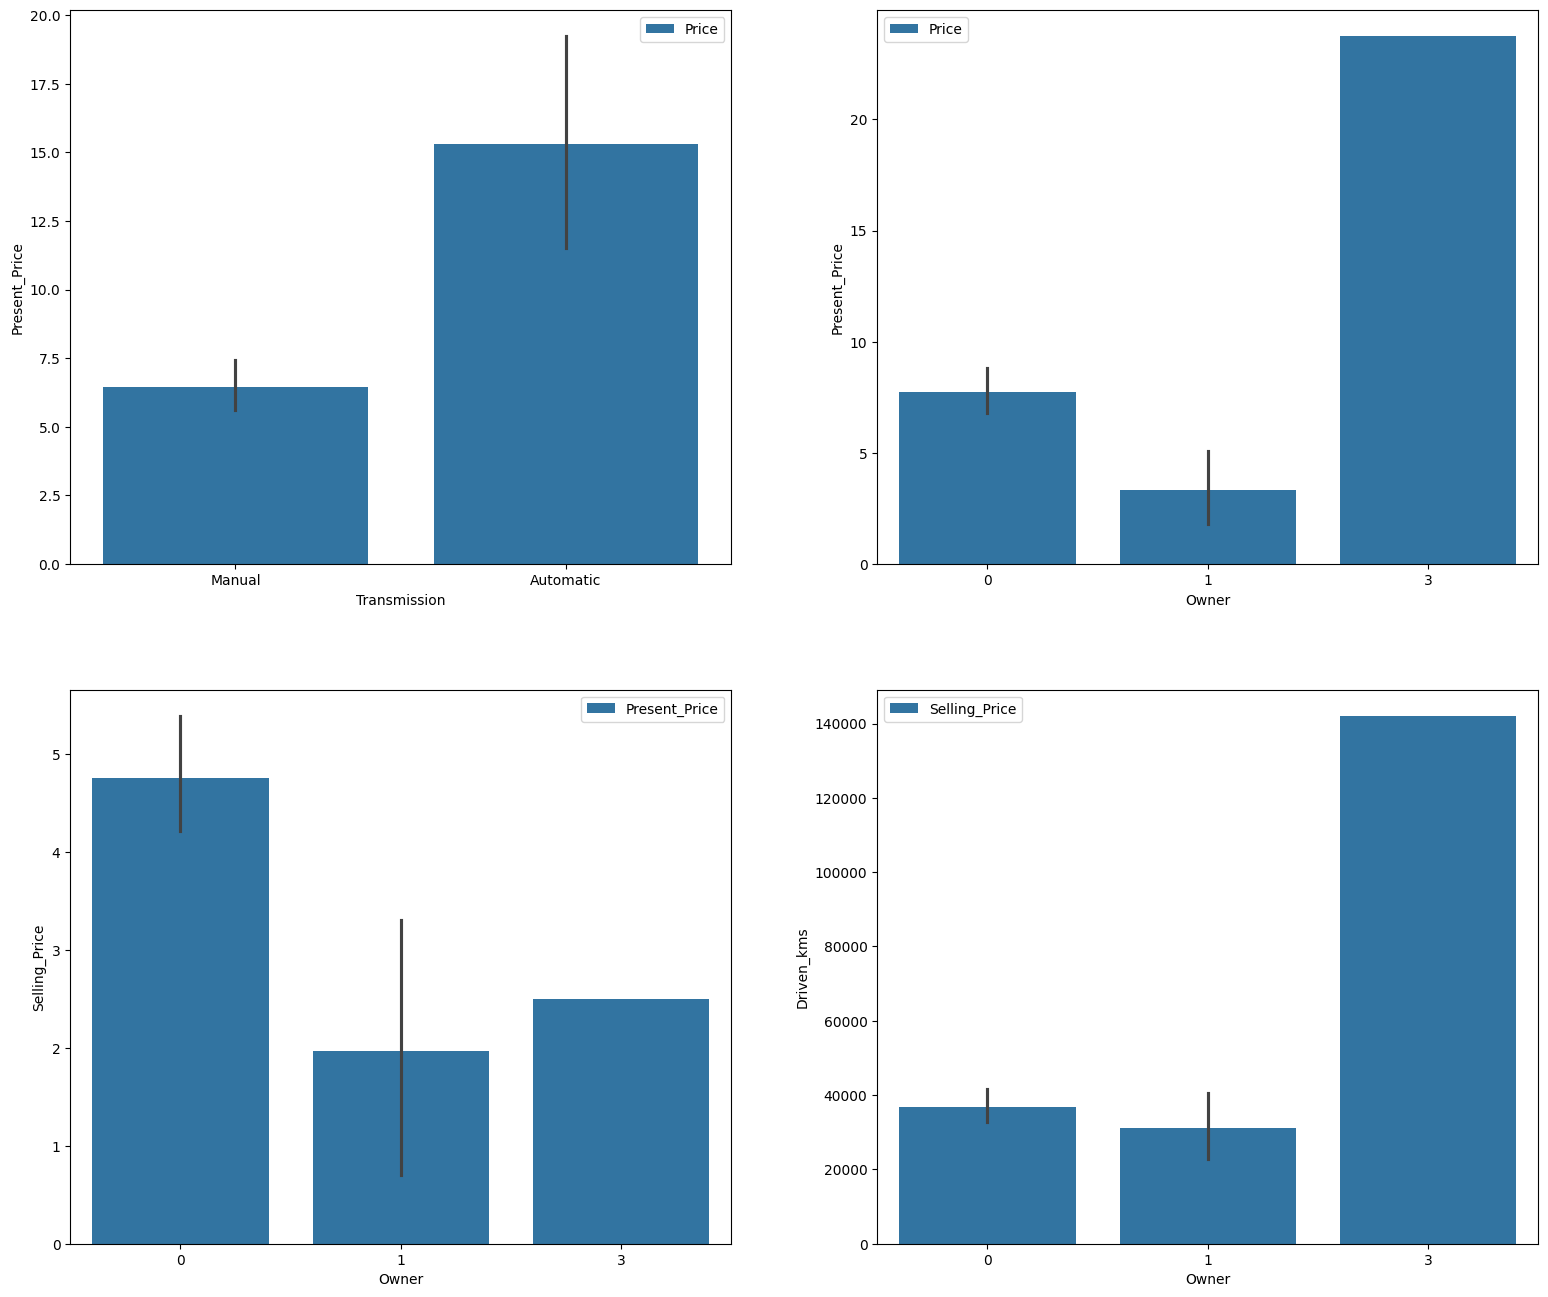

In [24]:
fig, axs = plt.pyplot.subplots(2,2)
fig.tight_layout(pad=1)
fig.set_size_inches(16.5, 14, forward=True)

sns.barplot(df,x='Transmission',y='Present_Price', label='Price', ax=axs[0,0])

sns.barplot(df,x='Owner',y='Present_Price', label='Price',ax=axs[0,1])
sns.barplot(df,x='Owner',y='Selling_Price', label='Present_Price',ax=axs[1,0])

sns.barplot(df,x='Owner',y='Driven_kms', label='Selling_Price',ax=axs[1,1])


<Axes: xlabel='Transmission', ylabel='Present_Price'>

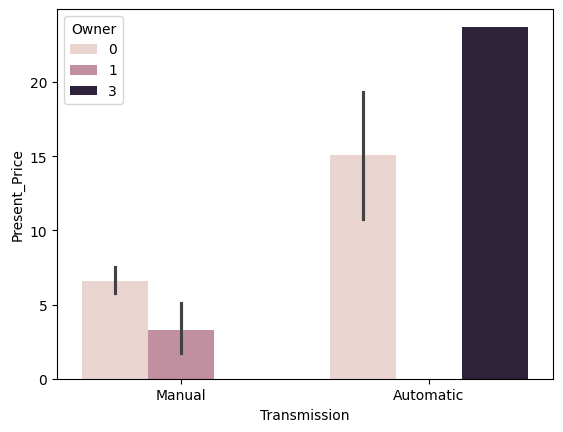

In [25]:


sns.barplot(df,x="Transmission", y="Present_Price", hue='Owner')


In [26]:
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.layouts import column
from bokeh.io import curdoc

In [27]:

source = ColumnDataSource(data=dict(
    x=df['Year'], 
    y=df['Driven_kms'], 
    Selling_Price=df['Selling_Price'], 
    Fuel_Type=df['Fuel_Type'], 
    Car_Name=df['Car_Name']
))


p = figure(title="Ежегодное изменение пробега от цены и типа топлива",
x_axis_label='Год',
y_axis_label='Пробег',
tools="pan,wheel_zoom,box_zoom,reset")


p.circle('x', 'y', size=8, color="navy", alpha=0.6, source=source)


hover = HoverTool()
hover.tooltips = [("Цена", "@Selling_Price"), ("Марка машины", "@Car_Name"), ("Тип топлива", "@Fuel_Type")]
p.add_tools(hover)
show(p)

In [33]:
df.to_pickle('../data/cardatas.pkl')

[4985:5015:1215/220940.709493:ERROR:registration_request.cc(291)] Registration response error message: DEPRECATED_ENDPOINT
[4985:5015:1215/221136.949894:ERROR:registration_request.cc(291)] Registration response error message: DEPRECATED_ENDPOINT
[4985:5015:1215/221430.246105:ERROR:registration_request.cc(291)] Registration response error message: DEPRECATED_ENDPOINT


find_ffmpeg failed, using the integrated library.


[6580:6580:1215/221654.530404:ERROR:brand_package_util.cc(112)] Failed to verify partner_config signature, config will be ignored
[6580:6580:1215/221654.639693:ERROR:isolated_origin_util.cc(75)] Ignoring port number in isolated origin: chrome://custo
[6580:6580:1215/221654.639713:ERROR:child_process_security_policy_impl.cc(2309)] Invalid isolated origin: 
[6580:6580:1215/221654.717121:ERROR:chrome_browser_cloud_management_controller.cc(342)] Cloud management controller initialization aborted as CBCM is not enabled.
[6580:6614:1215/221654.788532:ERROR:cprocsp_api.cc(847)] Failed to load library /opt/cprocsp/lib/amd64/libcapi20.so: /opt/cprocsp/lib/amd64/libcapi20.so: cannot open shared object file: No such file or directory
[6580:6614:1215/221954.856035:ERROR:upgrade_detector_impl.cc(544)] Unexpected product version output: find_ffmpeg failed, using the integrated library.
24.7.3.1234

[6580:6620:1215/221955.190167:ERROR:registration_request.cc(291)] Registration response error message: